# Feature Engineering

#### from Eda of the dataset we will be doing following Operations  
- 1. handle categorical values
- 2. standarize the values to the same range

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
data=pd.read_csv('full_data.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
data.shape

(4981, 11)

- First we will split the data for training and testing

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,data['stroke'],test_size=0.1,random_state=1)

In [5]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4482, 11), (499, 11), (4482,), (499,))

In [6]:
# pip install imblearn

In [7]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [8]:
categorical_feature=[feature for feature in data.columns if data[feature].dtype=='O']
numerical_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature!='stroke']
print('Categ :',categorical_feature)
print('nume :',numerical_feature)

Categ : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
nume : ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


In [9]:
for feature in categorical_feature:
    train_dummy=pd.get_dummies(X_train[feature])
    X_train=pd.concat([X_train,train_dummy],axis=1)
    test_dummy=pd.get_dummies(X_test[feature])
    X_test=pd.concat([X_test,test_dummy],axis=1)
    X_train=X_train.drop(feature,axis='columns')
    X_test=X_test.drop(feature,axis='columns')

In [10]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,No,Yes,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,31.0,0,0,108.62,29.2,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
1,66.0,0,1,94.62,29.7,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,68.0,0,0,222.58,37.4,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
3,45.0,0,0,79.47,28.1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,77.0,0,0,93.48,25.2,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0


In [11]:
y_train.value_counts()

0    4257
1     225
Name: stroke, dtype: int64

In [12]:
from imblearn.over_sampling import SMOTE


In [13]:
smote=SMOTE()

In [14]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [15]:
X_train_smote.shape,y_train_smote.shape

((8514, 20), (8514,))

In [16]:
y_train_smote.value_counts()

0    4257
1    4257
Name: stroke, dtype: int64

In [17]:
X_train = X_train_smote
y_train = y_train_smote

In [18]:
X=pd.concat([X_train,y_train],axis=1)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,No,Yes,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,stroke
0,31.0,0,0,108.62,29.2,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
1,66.0,0,1,94.62,29.7,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0
2,68.0,0,0,222.58,37.4,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,45.0,0,0,79.47,28.1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0
4,77.0,0,0,93.48,25.2,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0


In [20]:
# sns.pairplot(X,hue='stroke')
# X.columns

In [21]:
X_train.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,No,Yes,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
age,1.000000,0.141962,0.137189,0.264680,0.245217,0.581984,-0.131731,-0.128717,-0.675449,0.476777,-0.033807,-0.055408,0.144592,-0.609351,-0.150562,-0.081697,-0.440443,0.075806,-0.055514,-0.085683
hypertension,0.141962,1.000000,0.049925,0.083141,0.120390,-0.037154,0.006381,0.033449,-0.083021,0.084384,0.026425,-0.002295,0.129165,-0.081208,0.048155,-0.013269,-0.085296,0.018864,0.106961,0.036536
heart_disease,0.137189,0.049925,1.000000,0.169629,0.059207,-0.002184,-0.079523,0.092996,-0.065831,0.049782,0.030216,0.012722,0.052886,-0.060859,-0.006802,0.026396,-0.009166,0.045343,-0.012151,0.041458
avg_glucose_level,0.264680,0.083141,0.169629,1.000000,0.292052,0.244363,-0.180378,0.038297,-0.187830,0.196341,-0.042649,0.010310,-0.036906,-0.124389,-0.082251,-0.028368,-0.118641,0.013682,-0.050547,-0.044232
bmi,0.245217,0.120390,0.059207,0.292052,1.000000,0.140845,-0.082749,0.012664,-0.331231,0.268094,0.031535,0.150059,0.036414,-0.422691,-0.069255,-0.018894,-0.256328,0.080687,0.045865,0.060685
stroke,0.581984,-0.037154,-0.002184,0.244363,0.140845,1.000000,-0.258254,-0.176730,-0.425583,0.171582,-0.212097,-0.160701,-0.134869,-0.272180,-0.262670,-0.178345,-0.333058,-0.110864,-0.257500,-0.181953
Female,-0.131731,0.006381,-0.079523,-0.180378,-0.082749,-0.258254,1.000000,-0.645714,0.116489,-0.081564,0.082137,0.026255,0.057753,0.019033,0.096643,0.044196,0.046571,-0.031065,0.160925,0.024729
Male,-0.128717,0.033449,0.092996,0.038297,0.012664,-0.176730,-0.645714,1.000000,0.085210,-0.007841,0.030551,0.066044,0.017961,0.105138,0.033011,0.016217,0.118497,0.093129,-0.034406,0.050498
No,-0.675449,-0.083021,-0.065831,-0.187830,-0.331231,-0.425583,0.116489,0.085210,1.000000,-0.776134,-0.021512,-0.015451,-0.076311,0.583289,0.121262,0.075160,0.396948,-0.068124,0.038255,-0.005592
Yes,0.476777,0.084384,0.049782,0.196341,0.268094,0.171582,-0.081564,-0.007841,-0.776134,1.000000,0.049790,0.080753,0.095740,-0.452711,-0.047268,-0.070490,-0.280663,0.132549,0.006474,0.039414


In [22]:
import sklearn
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [23]:
scaling_feature=[feature for feature in X_train.columns if feature!='stroke']
scaling_feature

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'Female',
 'Male',
 'No',
 'Yes',
 'Govt_job',
 'Private',
 'Self-employed',
 'children',
 'Rural',
 'Urban',
 'Unknown',
 'formerly smoked',
 'never smoked',
 'smokes']

In [24]:
scalar.fit(X_train[scaling_feature])

StandardScaler()

In [25]:
X_train_transformed=pd.DataFrame(scalar.transform(X_train[scaling_feature]),columns=scaling_feature)
X_train_transformed.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,No,Yes,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,-1.094449,-0.291549,-0.226078,-0.176511,-0.008562,-0.914386,1.416084,-0.477535,0.615274,-0.282196,1.017776,-0.358788,-0.278541,-0.761694,1.179365,-0.468238,-0.390796,-0.589377,3.038614
1,0.493622,-0.291549,4.423259,-0.431908,0.075467,1.093631,-0.706173,-0.477535,0.615274,-0.282196,1.017776,-0.358788,-0.278541,-0.761694,1.179365,-0.468238,2.558881,-0.589377,-0.329097
2,0.584369,-0.291549,-0.226078,1.902424,1.369514,1.093631,-0.706173,-0.477535,0.615274,-0.282196,-0.982534,2.787163,-0.278541,-0.761694,1.179365,-0.468238,-0.390796,-0.589377,3.038614
3,-0.459220,-0.291549,-0.226078,-0.708285,-0.193426,1.093631,-0.706173,-0.477535,0.615274,3.543632,-0.982534,-0.358788,-0.278541,-0.761694,1.179365,-0.468238,-0.390796,1.696707,-0.329097
4,0.992730,-0.291549,-0.226078,-0.452705,-0.680794,1.093631,-0.706173,-0.477535,0.615274,-0.282196,1.017776,-0.358788,-0.278541,1.312863,-0.847914,-0.468238,2.558881,-0.589377,-0.329097


In [26]:
X_test_transformed=pd.DataFrame(scalar.transform(X_test[scaling_feature]),columns=scaling_feature)
X_test_transformed.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,No,Yes,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,0.176008,-0.291549,-0.226078,-0.880313,0.361166,-0.914386,1.416084,-0.477535,0.615274,3.543632,-0.982534,-0.358788,-0.278541,-0.761694,1.179365,-0.468238,-0.390796,1.696707,-0.329097
1,0.085261,-0.291549,-0.226078,-0.360397,0.159496,-0.914386,1.416084,-0.477535,0.615274,-0.282196,1.017776,-0.358788,-0.278541,1.312863,-0.847914,-0.468238,-0.390796,1.696707,-0.329097
2,1.128850,-0.291549,-0.226078,-0.259515,-1.672337,1.093631,-0.706173,-0.477535,0.615274,-0.282196,-0.982534,2.787163,-0.278541,1.312863,-0.847914,-0.468238,2.558881,-0.589377,-0.329097
3,0.629742,-0.291549,4.423259,1.460039,2.260222,1.093631,-0.706173,2.094087,-1.625292,-0.282196,1.017776,-0.358788,-0.278541,-0.761694,1.179365,-0.468238,-0.390796,-0.589377,3.038614
4,0.901983,-0.291549,-0.226078,-0.782715,1.436737,1.093631,-0.706173,-0.477535,0.615274,-0.282196,-0.982534,2.787163,-0.278541,1.312863,-0.847914,-0.468238,-0.390796,1.696707,-0.329097


In [27]:
X_train_transformed.shape,y_train.shape

((8514, 19), (8514,))

## feature Selection

In [28]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [29]:
feature_select_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_select_model.fit(X_train_transformed,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [30]:
feature_select_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [31]:
selected_features=X_train_transformed.columns[(feature_select_model.get_support())]
selected_features

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'Female', 'Male', 'No', 'Yes', 'Govt_job', 'Private', 'Self-employed',
       'children', 'Rural', 'Urban', 'Unknown', 'formerly smoked',
       'never smoked', 'smokes'],
      dtype='object')

In [32]:
print('total features: {}'.format((X_train_transformed.shape[1])))
print('selected features: {}'.format(len(selected_features)))
# print('features with coefficients shrank to zero: {}'.format(
#     np.sum(sel_.estimator_.coef_ == 0)))

total features: 19
selected features: 19


In [33]:
X_train=X_train_transformed[selected_features]
X_test=X_test_transformed[selected_features]

# Training model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
model=LogisticRegression(random_state=0)
# model=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(1,),random_state=1)
parameters={'penalty':['l2','l1'],'C':[1,2,3,4,1.5,2.5,9],'max_iter':[100,500,1000,1500]}
clf=GridSearchCV(model,parameters)
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 2, 3, 4, 1.5, 2.5, 9],
                         'max_iter': [100, 500, 1000, 1500],
                         'penalty': ['l2', 'l1']})

In [48]:
y_train_predict=clf.predict(X_train)
y_test_predict=clf.predict(X_test)

In [52]:
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': 0,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(random_state=0),
 'n_jobs': None,
 'param_grid': {'penalty': ['l2', 'l1'],
  'C': [1, 2, 3, 4, 1.5, 2.5, 9],
  'max_iter': [100, 500, 1000, 1500]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [54]:
clf.best_score_

0.9619479138563107

In [55]:
clf.best_params_

{'C': 2, 'max_iter': 100, 'penalty': 'l2'}

In [56]:
clf.score(X_test,y_test)

0.9599198396793587

In [36]:
# y_train_predict=model.predict(X_train)
# y_test_predict=model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


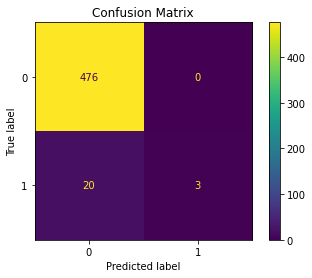

In [74]:
# from sklearn.metrics import confusion_matrix, r2_score, accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, accuracy_score, plot_confusion_matrix
cm = confusion_matrix(y_test, y_test_predict)
plot_confusion_matrix(clf, X_test, y_test)  # Replace 'model', 'X', and 'y_true' with your model object, input features, and true labels
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9599198396793587
[0.04609218 1.         1.        ]
[1.         0.13043478 0.        ]


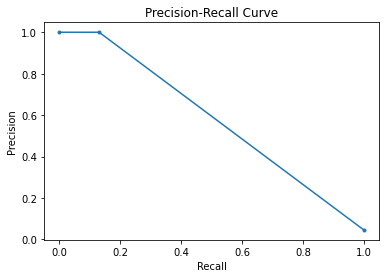

0    476
1     23
Name: stroke, dtype: int64

In [77]:
accuracy = accuracy_score(y_test, y_test_predict)
print(f'Accuracy: {accuracy}')
precision, recall, _ = precision_recall_curve(y_test, y_test_predict)
print(precision)
print(recall)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
y_test.value_counts()

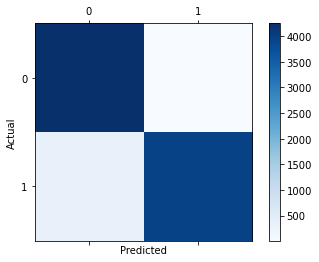

array([[4250,    7],
       [ 315, 3942]], dtype=int64)

In [63]:
conf_mat = confusion_matrix(y_true=y_train, y_pred=y_train_predict)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
conf_mat

In [64]:
print('TP:', conf_mat[1][1], '\nFP:', conf_mat[0][1], '\nTN:', conf_mat[0][0], '\nFN:', conf_mat[1][0], end='\n')
TP = conf_mat[1][1]
FP = conf_mat[0][1]
TN = conf_mat[0][0]
FN = conf_mat[1][0]
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*precision*recall/(precision+recall)
print('precision: ', precision, '\nrecall: ', recall)
print('F1_score: ', f1_score)

TP: 3942 
FP: 7 
TN: 4250 
FN: 315
precision:  0.9982273993416054 
recall:  0.9260042283298098
F1_score:  0.9607604192054595


In [60]:
y_test.value_counts()

0    476
1     23
Name: stroke, dtype: int64

In [61]:
from sklearn.metrics import precision_recall_fscore_support


In [62]:
precision_recall_fscore_support(y_test,y_test_predict,average = 'macro')

(0.9798387096774194, 0.5652173913043478, 0.605096549540994, None)